In [2]:
from prepare_network import cnn_network_contrastive, second_cnn_network
import torch

# import the weights inside embedding_256/seed0
# and visualize the embeddings

# load the model
# weights_path = '/Users/gayalkuruppu/Documents/Research/FoundationModel/CLOCS/test_results/chapman/CMLC/embedding_256/seed0/pretrained_weight'
weights_path = '/Users/gayalkuruppu/Documents/Research/Codes/CLOCS/embedding_256/seed0/pretrained_weight'
dropout_type = 'drop1d'
p1, p2, p3 = 0.1, 0.1, 0.1
model = cnn_network_contrastive(dropout_type=dropout_type, p1=p1, p2=p2, p3=p3,embedding_dim=256, device='cpu')
model.load_state_dict(torch.load(weights_path))
model.eval()


cnn_network_contrastive(
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
  (dropout3): Dropout(p=0.1, inplace=False)
  (relu): ReLU()
  (selu): SELU()
  (maxpool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (view_modules): ModuleList(
    (0): Sequential(
      (0): Conv1d(1, 4, kernel_size=(7,), stride=(3,))
      (1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Dropout(p=0.1, inplace=False)
      (5): Conv1d(4, 16, kernel_size=(7,), stride=(3,))
      (6): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (7): ReLU()
      (8): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (9): Dropout(p=0.1, inplace=False)
      (10): Conv1d(16, 32, kernel_size=(7,), stride=(3,))
      (11): BatchNorm1d(32, ep

In [3]:
for name, param in model.state_dict().items():
    print(f"Layer: {name}, Size: {param.size()}")
    print(param)

Layer: view_modules.0.0.weight, Size: torch.Size([4, 1, 7])
tensor([[[ 0.0075, -0.1590, -0.0769,  0.2873,  0.1307,  0.1390, -0.3237]],

        [[ 0.3309,  0.2685, -0.1039, -0.1093, -0.2360,  0.2105, -0.3488]],

        [[-0.1880, -0.3086,  0.2555,  0.2607,  0.1396, -0.2768,  0.1229]],

        [[ 0.0369, -0.1765, -0.2931, -0.2720,  0.3346, -0.0332,  0.4104]]])
Layer: view_modules.0.0.bias, Size: torch.Size([4])
tensor([ 0.1151, -0.2295,  0.1874,  0.2477])
Layer: view_modules.0.1.weight, Size: torch.Size([4])
tensor([0.9713, 1.0105, 0.9922, 1.0218])
Layer: view_modules.0.1.bias, Size: torch.Size([4])
tensor([-0.0906, -0.0301, -0.0881, -0.0444])
Layer: view_modules.0.1.running_mean, Size: torch.Size([4])
tensor([ 0.1171, -0.2246,  0.1895,  0.2506])
Layer: view_modules.0.1.running_var, Size: torch.Size([4])
tensor([0.0005, 0.0037, 0.0010, 0.0040])
Layer: view_modules.0.1.num_batches_tracked, Size: torch.Size([])
tensor(66000)
Layer: view_modules.0.5.weight, Size: torch.Size([16, 4, 7])
t

In [4]:
import pickle


def get_embedding(model, data):
    # make the data into a tensor
    data = torch.tensor(data)

    # convert to float 32
    data = data.to(torch.float32)

    # get the embedding
    # embedding = model.forward(test_data_point_1_tensor.to(torch.float64))
    data = data.reshape((data.shape[0], -1, data.shape[2], data.shape[1]))
    embedding = model.forward(data)
    print("embedding size: ", embedding.size())
    return embedding

def read_pickle(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    return data

def read_pickle_for_ecg(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)

    data = data['ecg'][1]
    print(data.keys())
    return data


frames_and_phases_path = "/Users/gayalkuruppu/Documents/Research/Datasets/ECG/chapman_ecg/contrastive_ss/leads_['II', 'V2', 'aVL', 'aVR']/frames_phases_chapman.pkl"
# frames_and_phases_path = "/Users/gayalkuruppu/Documents/Research/Datasets/chapman_ecg/contrastive_ml/leads_['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']/frames_phases_chapman.pkl"
labels_path = "/Users/gayalkuruppu/Documents/Research/Datasets/ECG/chapman_ecg/contrastive_ss/leads_['II', 'V2', 'aVL', 'aVR']/labels_phases_chapman.pkl"
pid_path = "/Users/gayalkuruppu/Documents/Research/Datasets/ECG/chapman_ecg/contrastive_ss/leads_['II', 'V2', 'aVL', 'aVR']/pid_phases_chapman.pkl"


ecg = read_pickle_for_ecg(frames_and_phases_path)
train_ecg = ecg['train']
test_ecg = ecg['test']

labels = read_pickle(labels_path)
embedding = get_embedding(model, train_ecg['All Terms'])

# labels = torch.tensor(labels)
# print("labels size: ", labels.size())

dict_keys(['train', 'val', 'test'])
embedding size:  torch.Size([6382, 256, 4])


In [5]:
labels_ecg = labels['ecg'][1]
train_labels_ecg = labels_ecg['train']['All Terms']

print("train_labels_ecg size: ", train_labels_ecg.shape)
print("first label: ", train_labels_ecg[2][0])

train_labels_ecg size:  (6382, 4)
first label:  1


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_points(points_x, points_y, labels, title, filename):

    points_x = np.array(points_x)
    points_y = np.array(points_y)
    group = np.array(labels)
    cdict = {0: 'tab:blue',
             1: 'tab:orange',
             2: 'tab:green',
             3: 'tab:red',
             4: 'tab:purple',
             5: 'tab:brown',
             6: 'tab:pink',
             7: 'tab:gray',
             8: 'tab:olive',
             9: 'tab:cyan'}
    
    fig, ax = plt.subplots()
    for g in np.unique(group):
        ix = np.where(group == g)
        ax.scatter(points_x[ix], points_y[ix], c = cdict[g], label = g, s = 6)
    ax.legend()
    
    plt.title(title)
    plt.savefig(filename)

seed:  0


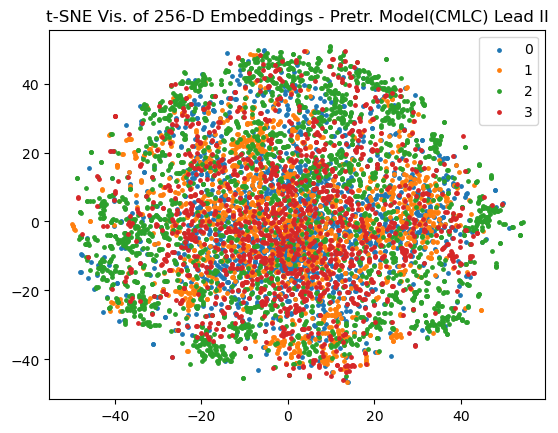

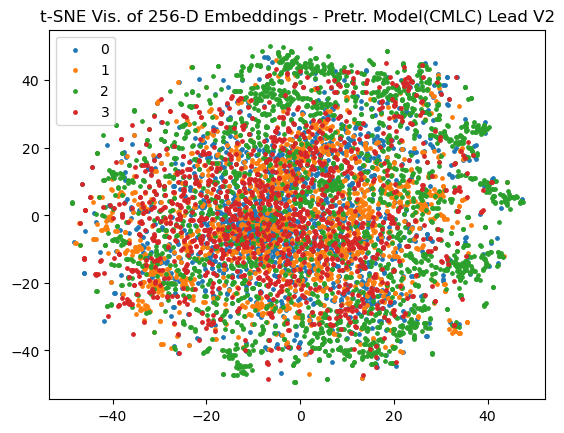

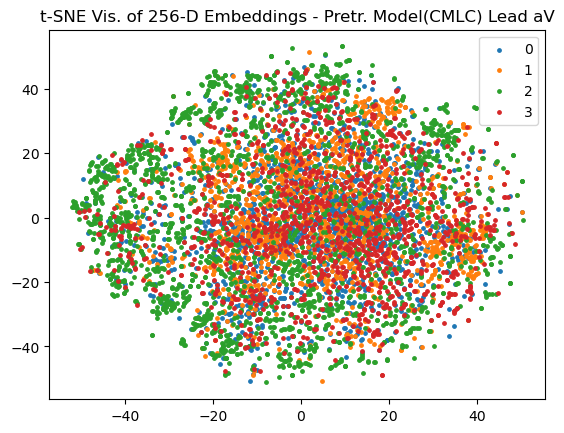

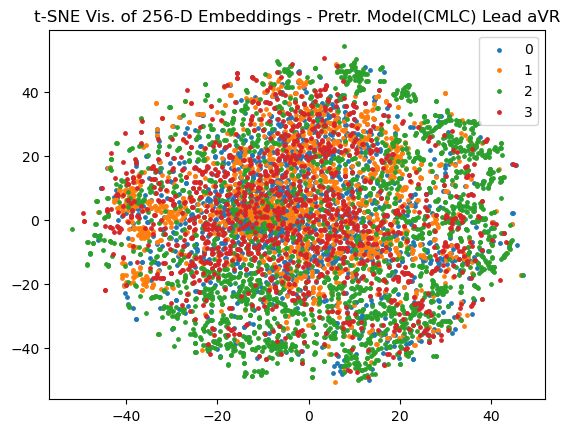

In [12]:
# embedding size:  torch.Size([6382, 256, 4])
# train_labels_ecg size:  (6382, 4)

from sklearn.manifold import TSNE
import os


if not os.path.exists('results'):
    os.makedirs('results')

if not os.path.exists('results/CMLC'):
    os.makedirs('results/CMLC')

if not os.path.exists('results/CMLC/embedding_256'):
    os.makedirs('results/CMLC/embedding_256')

# weights_path = '/Users/gayalkuruppu/Documents/Research/Codes/CLOCS/embedding_256/seed0/pretrained_weight'
# get the seed number from the weights path
seed = weights_path.split('/')[-2].split('seed')[-1]
print("seed: ", seed)

if not os.path.exists('results/CMLC/embedding_256/seed' + seed):
    os.makedirs('results/CMLC/embedding_256/seed' + seed)

if not os.path.exists('results/CMLC/embedding_256/seed' + seed + '/' + 'TSNE_plots'):
    os.makedirs('results/CMLC/embedding_256/seed' + seed + '/' + 'TSNE_plots')

saving_path = 'results/CMLC/embedding_256/seed' + seed + '/' + 'TSNE_plots'

Lead_II = embedding.detach().numpy()[:, :, 0]

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(Lead_II)

plot_points(points_x=embeddings_tsne[:, 0], 
            points_y=embeddings_tsne[:, 1], 
            labels=train_labels_ecg[:, 0], 
            title='t-SNE Vis. of 256-D Embeddings - Pretr. Model(CMLC) Lead II',
            filename=os.path.join(saving_path, 'lead_II.png'))

Lead_V2 = embedding.detach().numpy()[:, :, 1]

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(Lead_V2)

plot_points(points_x=embeddings_tsne[:, 0],
            points_y=embeddings_tsne[:, 1],
            labels=train_labels_ecg[:, 1],
            title='t-SNE Vis. of 256-D Embeddings - Pretr. Model(CMLC) Lead V2',
            filename=os.path.join(saving_path, 'lead_V2.png'))

Lead_aVL = embedding.detach().numpy()[:, :, 2]
embeddings_tsne = tsne.fit_transform(Lead_aVL)

plot_points(points_x=embeddings_tsne[:, 0],
            points_y=embeddings_tsne[:, 1],
            labels=train_labels_ecg[:, 2],
            title='t-SNE Vis. of 256-D Embeddings - Pretr. Model(CMLC) Lead aV',
            filename=os.path.join(saving_path, 'lead_aVL.png'))

Lead_aVR = embedding.detach().numpy()[:, :, 3]
embeddings_tsne = tsne.fit_transform(Lead_aVR)

plot_points(points_x=embeddings_tsne[:, 0],
            points_y=embeddings_tsne[:, 1],
            labels=train_labels_ecg[:, 3],
            title='t-SNE Vis. of 256-D Embeddings - Pretr. Model(CMLC) Lead aVR',
            filename=os.path.join(saving_path, 'lead_aVR.png'))



In [28]:
print("embedding tsne size: ", embeddings_tsne.shape)
print("unique labels: ", np.unique(train_labels_ecg[:, 0]))

embedding tsne size:  (6382, 2)
unique labels:  [0 1 2 3]


## UMAP

/Users/gayalkuruppu/anaconda3/envs/bio-sig-fm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


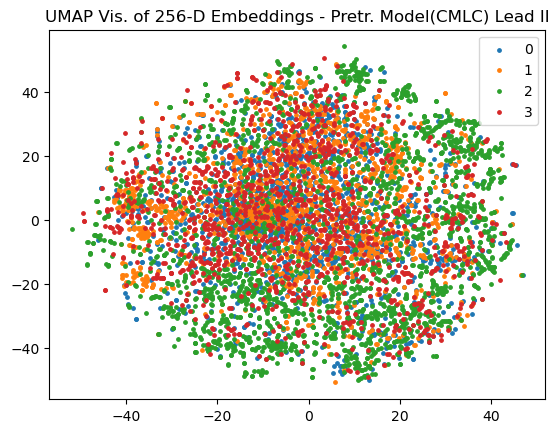

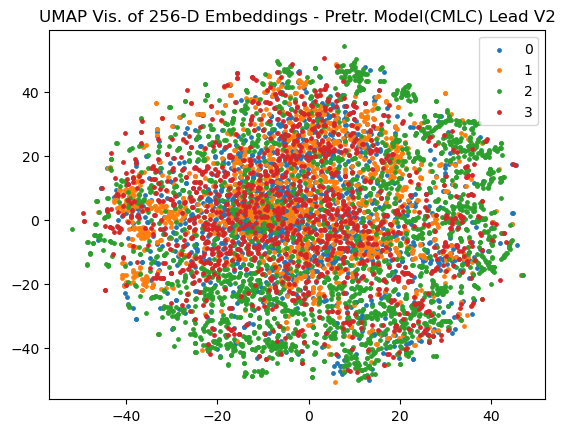

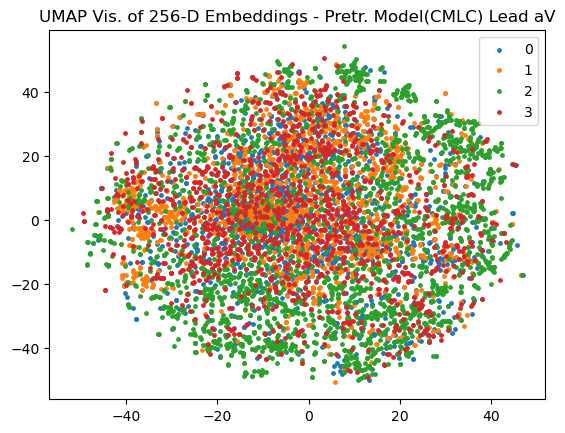

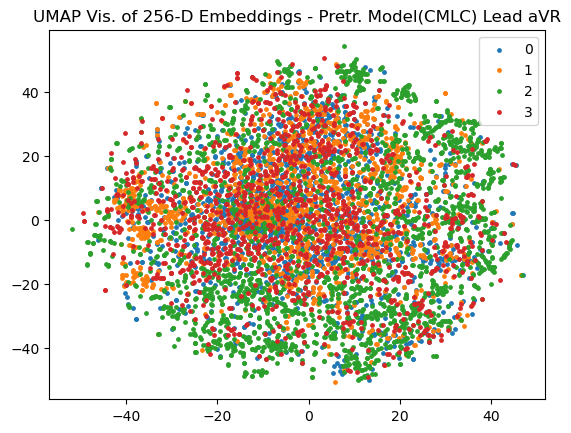

In [22]:
# embedding size:  torch.Size([6382, 256, 4])
# train_labels_ecg size:  (6382, 4)

import umap
import os


if not os.path.exists('results/CMLC/embedding_256/seed' + seed + '/' + 'UMAP_plots'):
    os.makedirs('results/CMLC/embedding_256/seed' + seed + '/' + 'UMAP_plots')

saving_path = 'results/CMLC/embedding_256/seed' + seed + '/' + 'UMAP_plots'

Lead_II = embedding.detach().numpy()[:, :, 0]

umap_model = umap.UMAP()
umap_lead_II = umap_model.fit_transform(Lead_II)

plot_points(points_x=embeddings_tsne[:, 0], 
            points_y=embeddings_tsne[:, 1], 
            labels=train_labels_ecg[:, 0], 
            title='UMAP Vis. of 256-D Embeddings - Pretr. Model(CMLC) Lead II',
            filename=os.path.join(saving_path, 'lead_II.png'))

Lead_V2 = embedding.detach().numpy()[:, :, 1]

umap_model = umap.UMAP()
umap_lead_V2 = umap_model.fit_transform(Lead_V2)

plot_points(points_x=embeddings_tsne[:, 0],
            points_y=embeddings_tsne[:, 1],
            labels=train_labels_ecg[:, 1],
            title='UMAP Vis. of 256-D Embeddings - Pretr. Model(CMLC) Lead V2',
            filename=os.path.join(saving_path, 'lead_V2.png'))

Lead_aVL = embedding.detach().numpy()[:, :, 2]

umap_model = umap.UMAP()
umap_lead_aVL = umap_model.fit_transform(Lead_aVL)

plot_points(points_x=embeddings_tsne[:, 0],
            points_y=embeddings_tsne[:, 1],
            labels=train_labels_ecg[:, 2],
            title='UMAP Vis. of 256-D Embeddings - Pretr. Model(CMLC) Lead aV',
            filename=os.path.join(saving_path, 'lead_aVL.png'))

Lead_aVR = embedding.detach().numpy()[:, :, 3]

umap_model = umap.UMAP()
umap_lead_aVR = umap_model.fit_transform(Lead_aVR)

plot_points(points_x=embeddings_tsne[:, 0],
            points_y=embeddings_tsne[:, 1],
            labels=train_labels_ecg[:, 3],
            title='UMAP Vis. of 256-D Embeddings - Pretr. Model(CMLC) Lead aVR',
            filename=os.path.join(saving_path, 'lead_aVR.png'))


In [49]:
dropout_type = 'drop1d'
p1, p2, p3 = 0.1, 0.1, 0.1

second_cnn_network = second_cnn_network(first_model=model, noutputs=4, embedding_dim=256)
second_cnn_network.load_state_dict(torch.load(weights_path))

second_cnn_network.eval()

output_after_second_cnn_network = second_cnn_network.forward(embedding)

RuntimeError: Error(s) in loading state_dict for second_cnn_network:
	Missing key(s) in state_dict: "first_model.view_modules.0.0.weight", "first_model.view_modules.0.0.bias", "first_model.view_modules.0.1.weight", "first_model.view_modules.0.1.bias", "first_model.view_modules.0.1.running_mean", "first_model.view_modules.0.1.running_var", "first_model.view_modules.0.5.weight", "first_model.view_modules.0.5.bias", "first_model.view_modules.0.6.weight", "first_model.view_modules.0.6.bias", "first_model.view_modules.0.6.running_mean", "first_model.view_modules.0.6.running_var", "first_model.view_modules.0.10.weight", "first_model.view_modules.0.10.bias", "first_model.view_modules.0.11.weight", "first_model.view_modules.0.11.bias", "first_model.view_modules.0.11.running_mean", "first_model.view_modules.0.11.running_var", "first_model.view_linear_modules.0.weight", "first_model.view_linear_modules.0.bias", "linear.weight", "linear.bias". 
	Unexpected key(s) in state_dict: "view_modules.0.0.weight", "view_modules.0.0.bias", "view_modules.0.1.weight", "view_modules.0.1.bias", "view_modules.0.1.running_mean", "view_modules.0.1.running_var", "view_modules.0.1.num_batches_tracked", "view_modules.0.5.weight", "view_modules.0.5.bias", "view_modules.0.6.weight", "view_modules.0.6.bias", "view_modules.0.6.running_mean", "view_modules.0.6.running_var", "view_modules.0.6.num_batches_tracked", "view_modules.0.10.weight", "view_modules.0.10.bias", "view_modules.0.11.weight", "view_modules.0.11.bias", "view_modules.0.11.running_mean", "view_modules.0.11.running_var", "view_modules.0.11.num_batches_tracked", "view_linear_modules.0.weight", "view_linear_modules.0.bias". 

# Plot original data

data_all_terms size:  (6382, 4, 2500)
data_lead_II size:  (6382, 2500)


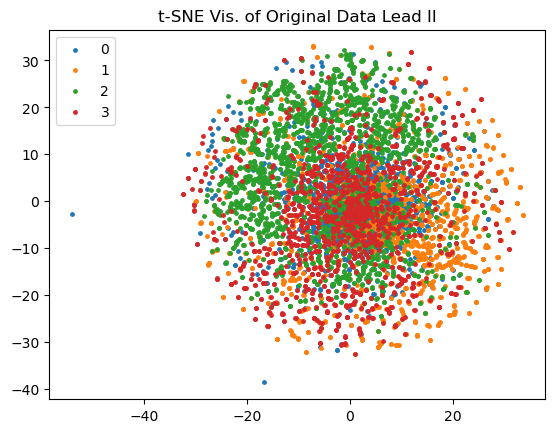

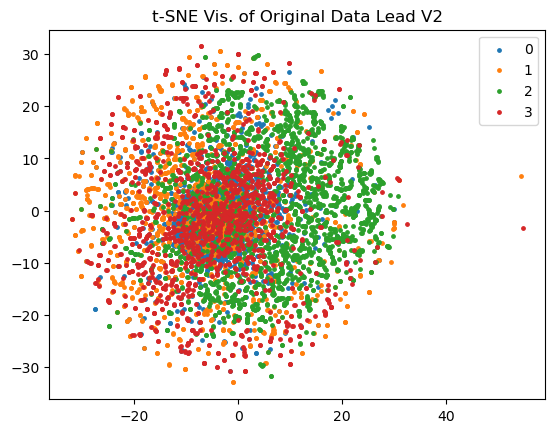

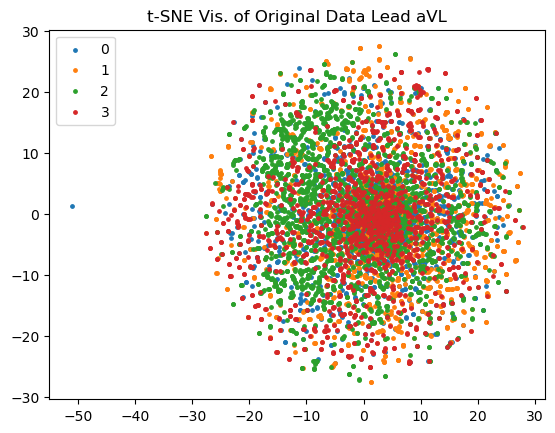

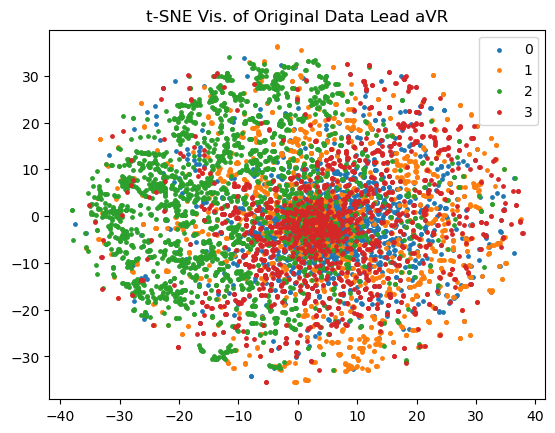

In [21]:
# get TSNE for train_ecg
from sklearn.manifold import TSNE
import os

tsne = TSNE(n_components=2, random_state=42)
data_all_terms = train_ecg['All Terms']
print("data_all_terms size: ", data_all_terms.shape)

#  get data for Lead II
data_lead_II = data_all_terms[:, 0, :]
print("data_lead_II size: ", data_lead_II.shape)
tsne_for_originanl_data = tsne.fit_transform(data_lead_II)

saving_path = 'results/orignal_data/TSNE_plots'

# recursively create directories
if not os.path.exists('results'):
    os.makedirs('results')

if not os.path.exists('results/orignal_data'):
    os.makedirs('results/orignal_data')

if not os.path.exists('results/orignal_data/TSNE_plots'):
    os.makedirs('results/orignal_data/TSNE_plots')

plot_points(points_x=tsne_for_originanl_data[:, 0],
            points_y=tsne_for_originanl_data[:, 1],
            labels=train_labels_ecg[:, 0],
            title='t-SNE Vis. of Original Data Lead II',
            filename=os.path.join(saving_path, 'original_lead_II.png'))

# do it for other leads
data_lead_V2 = data_all_terms[:, 1, :]
tsne_for_originanl_data = tsne.fit_transform(data_lead_V2)

plot_points(points_x=tsne_for_originanl_data[:, 0],
            points_y=tsne_for_originanl_data[:, 1],
            labels=train_labels_ecg[:, 1],
            title='t-SNE Vis. of Original Data Lead V2',
            filename=os.path.join(saving_path, 'original_lead_V2.png'))

data_lead_aVL = data_all_terms[:, 2, :]
tsne_for_originanl_data = tsne.fit_transform(data_lead_aVL)

plot_points(points_x=tsne_for_originanl_data[:, 0],
            points_y=tsne_for_originanl_data[:, 1],
            labels=train_labels_ecg[:, 2],
            title='t-SNE Vis. of Original Data Lead aVL',
            filename=os.path.join(saving_path, 'original_lead_aVL.png'))

data_lead_aVR = data_all_terms[:, 3, :]
tsne_for_originanl_data = tsne.fit_transform(data_lead_aVR)

plot_points(points_x=tsne_for_originanl_data[:, 0],
            points_y=tsne_for_originanl_data[:, 1],
            labels=train_labels_ecg[:, 3],
            title='t-SNE Vis. of Original Data Lead aVR',
            filename=os.path.join(saving_path, 'original_lead_aVR.png'))



# Misc

In [ ]:
with open(frames_and_phases_path, 'rb') as f:
    frames_and_phases = pickle.load(f)
    print("frames and phases length: ", len(frames_and_phases))
    # print keys
    print("keys: ", frames_and_phases.keys())
    ecg = frames_and_phases['ecg']
    # print keys
    print("ecg keys: ", ecg.keys())
    ecg1 = ecg[1]
    # print keys
    print("ecg1 keys: ", ecg1.keys())
    # get the train data
    train_data = ecg1['train']
    print("train data len: ", len(train_data))
    # get keys of the train data
    print("train data keys: ", train_data.keys())
    train_data_all_terms = train_data['All Terms']
    print("train data all terms len: ", len(train_data_all_terms))
    # get the test data
    test_data = ecg1['test']
    print("test data len: ", len(test_data))
    # get keys of the test data
    print("test data keys: ", test_data.keys())
    test_data_all_terms = test_data['All Terms']
    print("test data all terms len: ", len(test_data_all_terms))
    # get the validation data
    val_data = ecg1['val']
    print("val data len: ", len(val_data))
    # get keys of the val data
    print("val data keys: ", val_data.keys())
    val_data_all_terms = val_data['All Terms']
    print("val data all terms len: ", len(val_data_all_terms))

    # print total
    print("total: ", len(train_data_all_terms) + len(test_data_all_terms) + len(val_data_all_terms))

    # data_point = 100
    # # get the test data point 1
    # test_data_point_1 = test_data_all_terms[data_point]
    # print("test data point 1 len: ", len(test_data_point_1))
    # # print("test data point 1 : ", test_data_point_1)

    # data_lead = 0
    # # get the test data point 1 lead 1
    # test_data_point_1_lead_1 = test_data_point_1[data_lead]
    # print("test data point 1 lead 1 len: ", len(test_data_point_1_lead_1))
    # # print("test data point 1 lead 1 : ", test_data_point_1_lead_1)

    # # # plot the test data point 1 lead 1
    # # import matplotlib.pyplot as plt
    # # plt.plot(test_data_point_1_lead_1)
    # # plt.show()

    # test_data_point_1_tensor = torch.tensor(test_data_point_1[:1,:])
    # test_data_point_1_tensor = test_data_point_1_tensor.unsqueeze(0) # for batch size
    # test_data_point_1_tensor = test_data_point_1_tensor.unsqueeze(3) # for n views, change this?
    # print("test data point 1 tensor shape: ", test_data_point_1_tensor.shape)
    # # change the data type
    # test_data_point_1_tensor = test_data_point_1_tensor.to(torch.float32)
    # print("test data point 1 tensor type: ", test_data_point_1_tensor.dtype)


    # all the data
    print("train_data_all_terms.shape ", train_data_all_terms.shape)
    
    # make the data into a tensor
    train_data_all_terms = torch.tensor(train_data_all_terms)

    # convert to float 32
    train_data_all_terms = train_data_all_terms.to(torch.float32)

    # get the embedding
    # embedding = model.forward(test_data_point_1_tensor.to(torch.float64))
    train_data_all_terms = train_data_all_terms.reshape((train_data_all_terms.shape[0], -1, train_data_all_terms.shape[2], train_data_all_terms.shape[1]))
    embedding = model.forward(train_data_all_terms)
    print("embedding size: ", embedding.size())


# DataLoader version

In [1]:
# load the dataloader through load_initial_data_contrastive in prepare_dataloaders.py
from prepare_dataloaders import load_initial_data_contrastive
import torch

# load the data
basepath_to_data = "/Users/gayalkuruppu/Documents/Research/Datasets/ECG"
leads = ['II', 'V2', 'aVL', 'aVR']
batch_size = 1
phases = ['train']
fraction = [1]
inferences = ['All Terms']
modalities = ['ecg']
acquired_indices = []
acquired_labels = []
downstream_dataset = 'chapman'
downstream_task = 'CMLC'
input_perturbed = False
perturbation = 'None'
class_pair = []
trial_to_run = None
nviews = 1
labelled_fraction = 1

# get the dataloaders
dataloader, operations = load_initial_data_contrastive(basepath_to_data,phases,fraction,inferences,batch_size,modalities,acquired_indices,acquired_labels,modalities,downstream_dataset,downstream_task=downstream_task,input_perturbed=input_perturbed,perturbation=perturbation,leads=leads,class_pair=class_pair,trial=trial_to_run,nviews=nviews,labelled_fraction=labelled_fraction)


TypeError: sequence item 3: expected str instance, list found

In [1]:
import pickle

patient_rep_path = "/Users/gayalkuruppu/Documents/Research/FoundationModel/CLOCS/results/Contrastive_Learning_Results/CMLC/chapman/leads_['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']/embedding_256/seed0/patient_rep"

with open(patient_rep_path, 'rb') as f:
    patient_rep = pickle.load(f)
    print("\npatient_rep len: ", len(patient_rep))
    print("patient_rep keys: ", patient_rep.keys())
    # get key vals for train1 and val
    train1 = patient_rep['train1']
    print("train1 len: ", len(train1))
    print("train1 keys: ", train1.keys())
    val = patient_rep['val']
    print("val len: ", len(val))
    print("val keys: ", val.keys())


patient_rep len:  2
patient_rep keys:  dict_keys(['train1', 'val'])
train1 len:  6379
train1 keys:  dict_keys(['MUSE_20180111_155115_19000', 'MUSE_20180111_155154_74000', 'MUSE_20180111_155203_15000', 'MUSE_20180111_155249_70000', 'MUSE_20180111_155542_84000', 'MUSE_20180111_155543_90000', 'MUSE_20180111_155709_17000', 'MUSE_20180111_155710_23000', 'MUSE_20180111_155758_17000', 'MUSE_20180111_155859_36000', 'MUSE_20180111_155903_57000', 'MUSE_20180111_155907_78000', 'MUSE_20180111_160033_11000', 'MUSE_20180111_160052_85000', 'MUSE_20180111_160110_47000', 'MUSE_20180111_160117_84000', 'MUSE_20180111_160140_78000', 'MUSE_20180111_160333_03000', 'MUSE_20180111_160334_09000', 'MUSE_20180111_160357_99000', 'MUSE_20180111_160433_26000', 'MUSE_20180111_160435_36000', 'MUSE_20180111_160502_52000', 'MUSE_20180111_160522_18000', 'MUSE_20180111_160605_69000', 'MUSE_20180111_160608_87000', 'MUSE_20180111_160610_98000', 'MUSE_20180111_160613_11000', 'MUSE_20180111_160656_72000', 'MUSE_20180111_160

In [2]:
test_metrics_path = "/Users/gayalkuruppu/Documents/Research/FoundationModel/CLOCS/results/Contrastive_Learning_Results/CMLC/chapman/leads_['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']/embedding_256/seed1/test_metrics_dict"

with open(test_metrics_path, 'rb') as f:
    test_metrics = pickle.load(f)
    # print("\ntest_metrics len: ", len(test_metrics))
    print("test_metrics keys: ", test_metrics.keys())
   

UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.